Linear Regression: Bike Share + Advertising Sales

In [1]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,6)
plt.style.use("fivethirtyeight")

In [2]:
#read the data n and set the datetime as the index
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv"
bikes = pd.read_csv(url, index_col =  "datetime", parse_dates = True)

In [3]:
#see what it looks like
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
#check it's shape
bikes.shape

(10886, 11)

In [5]:
#Rename columns for making more sense of things
bikes.rename(columns = {"count":"total"}, inplace = True)
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# EDA

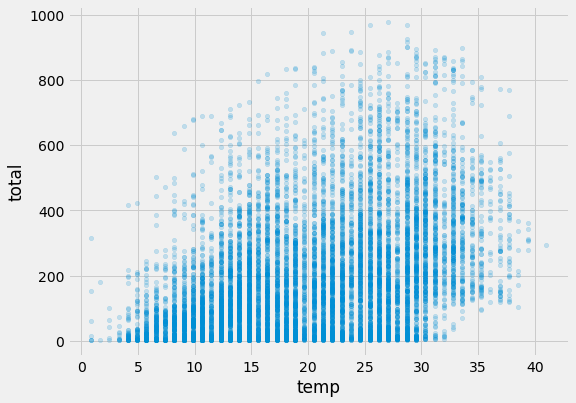

In [6]:
#scatter plot in pandas
bikes.plot(kind = "scatter", x = "temp", y = "total", alpha = 0.2)
#alpha adjusts the transparency

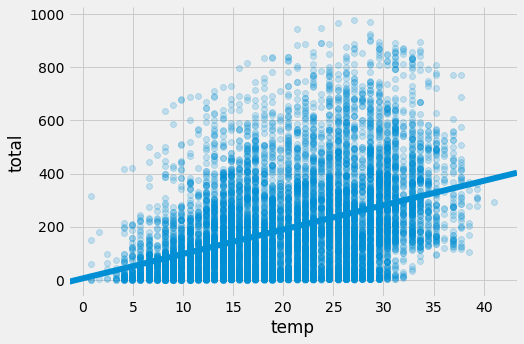

In [7]:
#seaborn scatter plot with regression line
sns.lmplot(x = "temp", y = "total", data = bikes, aspect = 1.5, scatter_kws={"alpha":0.2})

## Build a Linear Regression Model

In [8]:
#Build the x + y axes
feature_cols = ["temp"]
X = bikes[feature_cols]
y = bikes.total

#import, instantiate, fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
#print the coefficients
linreg.coef_

array([ 9.17054048])

for every change in x (temperature), there is a 9.1 uptick in y (total riders)
a temperature increase of 1 degree is RELATED TO (not causes) a rental increase of 9.1 riders

In [10]:
#we can use this to predict
linreg.predict(25)

array([ 235.309725])

at 25c degrees, there are typically 235 riders exist. **But what riders?**

In [11]:
#test those other riders!
X = bikes[feature_cols]
y1 = bikes.casual

#fit (already imported and instantiated)
casual = linreg.fit(X, y1)

In [12]:
linreg.coef_

array([ 2.99507448])

In [13]:
y2 = bikes.registered

linreg.fit(X, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
linreg.coef_

array([ 6.175466])

Seems like the riders go up for registered users more!

How about that humidity? 

In [15]:
feature_cols = ["temp", "humidity"]
X = bikes[feature_cols]
y = bikes.total

#instantiate, fit
linreg = LinearRegression()
linreg.fit(X, y)

#print the intercept and coeff
print(linreg.intercept_)
print(linreg.coef_)

185.66441725
[ 8.7281356  -2.75775952]


## Let's visualize that!

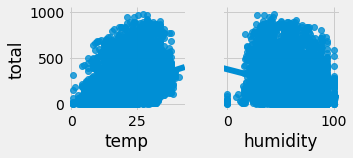

In [16]:
#multiple scatters in seaborn
plt.figure(figsize = (16, 3))
sns.pairplot(bikes, x_vars = feature_cols, y_vars = "total", kind = "reg")

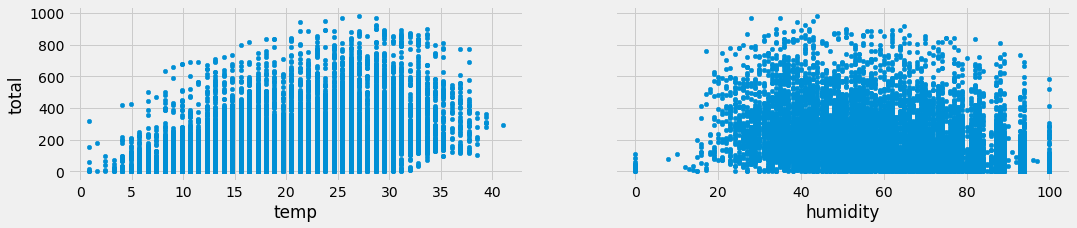

In [17]:
#multiple scatters in pandas
fig, axs = plt.subplots(1, len(feature_cols), sharey = True)
for index, feature in enumerate(feature_cols):
    bikes.plot(kind = "scatter", x = feature, y = "total", ax = axs[index], figsize = (16,3))

## More Eda

In [18]:
#how about a crosstabulation? 
pd.crosstab(bikes.season, bikes.index.month)
# shows us that season 1 is January to March, etc. Great to know about our data!

col_0,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
1,884,901,901,0,0,0,0,0,0,0,0,0
2,0,0,0,909,912,912,0,0,0,0,0,0
3,0,0,0,0,0,0,912,912,909,0,0,0
4,0,0,0,0,0,0,0,0,0,911,911,912


In [19]:
#let's do a correlation, and have it round to 2 decimal places
bikes.corr().round(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
season,1.00,0.03,-0.01,0.01,0.26,0.26,0.19,-0.15,0.10,0.16,0.16
holiday,0.03,1.00,-0.25,-0.01,0.00,-0.01,0.00,0.01,0.04,-0.02,-0.01
workingday,-0.01,-0.25,1.00,0.03,0.03,0.02,-0.01,0.01,-0.32,0.12,0.01
weather,0.01,-0.01,0.03,1.00,-0.06,-0.06,0.41,0.01,-0.14,-0.11,-0.13
temp,0.26,0.00,0.03,-0.06,1.00,0.98,-0.06,-0.02,0.47,0.32,0.39
atemp,0.26,-0.01,0.02,-0.06,0.98,1.00,-0.04,-0.06,0.46,0.31,0.39
humidity,0.19,0.00,-0.01,0.41,-0.06,-0.04,1.00,-0.32,-0.35,-0.27,-0.32
windspeed,-0.15,0.01,0.01,0.01,-0.02,-0.06,-0.32,1.00,0.09,0.09,0.10
casual,0.10,0.04,-0.32,-0.14,0.47,0.46,-0.35,0.09,1.00,0.50,0.69
registered,0.16,-0.02,0.12,-0.11,0.32,0.31,-0.27,0.09,0.50,1.00,0.97


## Let's try a lin reg with all of the categories that seem to have high correlations.

In [20]:
#Create a list of features
feature_cols = ["temp", "season", "weather", "humidity"]

#Create X and y datasets
X = bikes[feature_cols]
y = bikes.total

#instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

#print the coefficients using a zip
print(pd.Series(list(zip(feature_cols, linreg.coef_))))

0        (temp, 7.86482499248)
1      (season, 22.5387575325)
2     (weather, 6.67030203592)
3    (humidity, -3.1188733824)
dtype: object


- holding all other features fixed, a 1 unit increase in temperature = a rental increase of 7.8 bikes
- holding all other features fixed, a 1 unit increase in season = a rental increase of 22.5 bikes
- holding all other features fixed, a 1 unit increase in weather is associated with rental increase of 6.67 bikes
- ....., a 1 unit increase in humidity = a rental DECREASE of 3.1 bikes
                         

In [52]:
#so how many riders if it's 50 degrees, in the spring (2), hot, and with high humidity
#predicts the Y (bicyclists) using our linear model
predictions = linreg.predict(X)[0:5]
print(predictions)
print(linreg.score(X,y))

[ 20.50337679  12.51204344  12.20869184  17.76781079  13.08098044]
0.898161187539


## so far, we've been working on the whole data set
But, how can we tell if we're predicting anything if all of our data points are in the calculation?! So let's use our tools to create a training set, which we'll evaluate against a test set

In [21]:
#import
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

#define a function that accepts a list fo features and retursn testing RMSE
def train_test_rmse(feature_cols):
    X = bikes[feature_cols]
    y = bikes.total
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42) #random_state lets you keep it from total random
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [22]:
#compare different sets of features
print(train_test_rmse(["temp", "season", "weather", "humidity"]))
print(train_test_rmse(["temp", "season", "weather"]))
print(train_test_rmse(["weather", "humidity", "temp"]))

155.034961972
163.854906635
156.514532363


These are errors in units of the dependent variables. So, when we check how our model predicts # of riders based on all of the feature columns, we see that we're within 155 riders. That's not bad given the size of our data set. 

- you can "normalize" RMSE by taking RMSE / (max(DV) - min(DV)


## Plotting residuals
helps us seee not just the degree to which we're wrong, but HOW we're wrong

In [23]:
#Define a function that accepts a list of features and returns an array of the y_test variables and the predictions from x_test
def train_test_residuals(feature_cols):
    X = bikes[feature_cols]
    y = bikes.total
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return y_pred, y_test - y_pred
pred, residuals = train_test_residuals(["temp", "season", "weather", "humidity"])

In [24]:
residuals.head()

datetime
2012-03-07 21:00:00     51.773024
2012-04-12 03:00:00   -117.698422
2011-02-06 10:00:00    -32.381843
2011-12-05 23:00:00    -76.525877
2011-08-08 14:00:00   -216.695189
Name: total, dtype: float64

(array([  62.,  383.,  899.,  706.,  317.,  181.,   77.,   48.,   38.,   11.]),
 array([-335.04924559, -234.92795608, -134.80666657,  -34.68537705,
          65.43591246,  165.55720198,  265.67849149,  365.799781  ,
         465.92107052,  566.04236003,  666.16364954]),
 <a list of 10 Patch objects>)

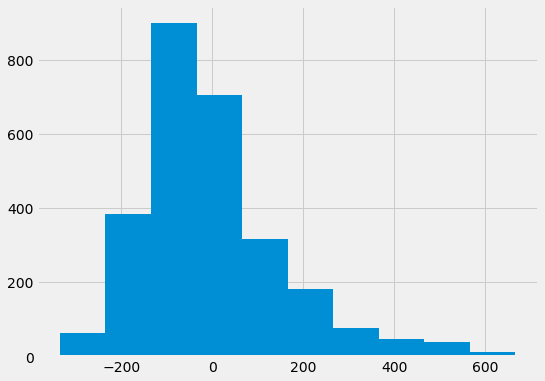

In [25]:
#Visualize it to make more sense
plt.hist(residuals)
#a histogram shows you the frequency of one specific quantity

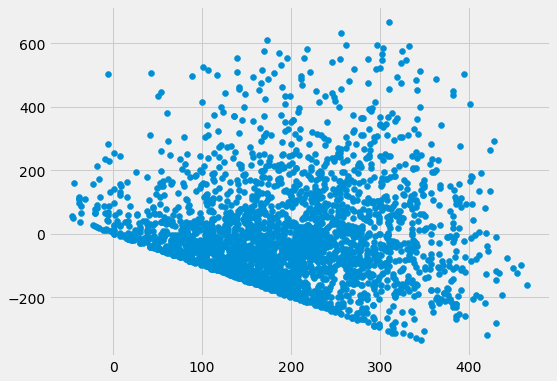

In [26]:
#You can use a scatter plot to compare our residuals to their actual value
plt.scatter(pred, residuals)

## Handling Categorical Predictors with 2 categories and >2 categories

In [28]:
#Let's try a new dataset
data = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv", index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [29]:
#Get teh details
data.shape

(200, 4)

In [31]:
#Let's make it a bit more complex by adding columns NEVER DO THIS OUTSIDE OF PRACTICE
import numpy as np

#set a seed for reproducability
np.random.seed(12345)

#create a series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > .5

#initially set column size to small, then change roughly half to large
data["Size"]  = "small"
data.loc[mask_large, "Size"] = "large"
data.head()

,TV,radio,newspaper,sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


In [32]:
#Let's add one more column, we'll call it area, and divide it between urban, suburban, and rural
np.random.seed(123456)

#assign foughly one third of observations to each group of an area call rural, suburban, or urban
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.333) & (nums < 0.66)
mask_urban = nums > 0.66
data["Area"] = "rural" 
data.loc[mask_suburban, "Area"] =  "suburban"
data.loc[mask_urban , "Area"] =  "urban"
data.head()

,TV,radio,newspaper,sales,Size,Area
1,230.1,37.8,69.2,22.1,large,rural
2,44.5,39.3,45.1,10.4,small,urban
3,17.2,45.9,69.3,9.3,small,rural
4,151.5,41.3,58.5,18.5,small,urban
5,180.8,10.8,58.4,12.9,large,suburban


In order to use scikit learn, we need to represent data numerically. If the feature only has two categories we create a **dummy vairable** that represents the categories as binary values

In [37]:
#create a new column for numericizing large v. small
data["IsLarge"] =  data.Size.map({"small": 0, "large": 1})
data.head()

,TV,radio,newspaper,sales,Size,Area,IsLarge
1,230.1,37.8,69.2,22.1,large,rural,1
2,44.5,39.3,45.1,10.4,small,urban,0
3,17.2,45.9,69.3,9.3,small,rural,0
4,151.5,41.3,58.5,18.5,small,urban,0
5,180.8,10.8,58.4,12.9,large,suburban,1


## Linear Regression time!
No need to EDA - we know what we want from a business perspective: where should we buy advertising in order to make more sales $$?!

In [41]:
#Let's do a regression to see how the category of size effects it!
feature_cols = ["TV", "radio", "newspaper", "IsLarge"]
X = data[feature_cols]
y = data.sales

#instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

#look at those coefs
print(pd.Series(list(zip(feature_cols, linreg.coef_))))

0             (TV, 0.0457198209244)
1           (radio, 0.188728143134)
2    (newspaper, -0.00109767944835)
3        (IsLarge, 0.0574238508548)
dtype: object


How do we interpret that coef for IsLarge? For a given amount of TV/Radio/Newspaper ad spending, being a large market is associated with an average increase in sales of 57.42 widgets (or, spending what you do in a small market will on average grab you 57.42 more widgets in a large area). 

What if we have categorical predictors of more than two categories? Such as Area!

In [43]:
#we can't simply do 0, 1, 2, as that implies an ordered relationship (urban is somehow twice the suburban)
#create three dummy variables, then exclude the first (logic! if it's not urban or suburban, it must be rural)
area_dummies = pd.get_dummies(data.Area, prefix = "Area").iloc[:, 1:]

#concatenate the dummy column to the origianl df.  remember axis = 0 means rows, axis = 1 means columns
data = pd.concat([data, area_dummies], axis = 1)
data.head()

,TV,radio,newspaper,sales,Size,Area,IsLarge,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,rural,1,0,0
2,44.5,39.3,45.1,10.4,small,urban,0,0,1
3,17.2,45.9,69.3,9.3,small,rural,0,0,0
4,151.5,41.3,58.5,18.5,small,urban,0,0,1
5,180.8,10.8,58.4,12.9,large,suburban,1,1,0


so now, we interpret the df as 
- rural is area_suburban = 0, area_urban = 0
- suburban is coded as area_suburban = 1, area_urban = 0
- urban is coded as area_suburban = 0, area_urban = 1

In [44]:
#Let's try the new variables!
# Create X and y
feature_cols = ["TV", "radio", "newspaper", "IsLarge", "Area_suburban", "Area_urban"]
X = data[feature_cols]
y = data.sales

#instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

#print the coefs
print(pd.Series(list(zip(feature_cols, linreg.coef_))))

0              (TV, 0.0457440103633)
1            (radio, 0.187866695525)
2     (newspaper, -0.00108769772671)
3         (IsLarge, 0.0773966074975)
4    (Area_suburban, -0.10656299016)
5       (Area_urban, 0.268138021652)
dtype: object


So! Being a suburban area means that all things being equal, you will lose the sale of 106.56 widgest (compared to the base level of rural)
Being an urban area is assocaited witha n average increase of Sales of 268.13 widgests. 

In other words, we should be incredibly suspicious of this dataset! In what world would a larger market result in less sales? Is sales really that simply mutable? 
